# This notebook will show how to use wnnet module

In [1]:
import wnnet.net as wn
import wnnet.nuc as wnuc
import wnnet.consts as wc
import wnnet.reac as wr
import wnnet.flows as wf
import wnnet.zones as wz
import wnnet.graph as wg

### Computing physical constants

This module contains the physical constants such as the speed of light and Boltzmann's constant used in the calculations for
the wnnet package.  webnucleo codes use constants defined in the GNU Scientific
Library (GSL).  For consistency, the wnnet package uses the same constants,
which are defined here.

In [2]:
print('Speed of light in cm/s :', wc.c)
print('Unit Transfer from Energy to Mev :', wc.ergs_to_MeV)
print('Boltzman Constant :', wc.GSL_CONST_CGS_BOLTZMANN)
print('Mass of Electron :', wc.GSL_CONST_CGS_MASS_ELECTRON)

Speed of light in cm/s : 29979245800.0
Unit Transfer from Energy to Mev : 624150.9647120418
Boltzman Constant : 1.3806504e-16
Mass of Electron : 9.10938188e-28


In [3]:
net = wn.Net("out.xml")

### Compute nuclide data

You can retrieve the nuclide data in the webnucleo XML file by typing:

In [4]:
nuclides = net.get_nuclides()

This returns a dictionary of data with the key being the nuclide name. Here I will show the first two nuclides. For each nuclide, the attributes are nuclide name, z, n, a and et al, which can be found below. 

In [5]:
example = list(nuclides.items())[:2]

for keys, nuclide in example:
    print('Nuclide Name :', keys)
    for attribute, value in nuclide.items():
        print('{} : {}'.format(attribute, value))
    print()

Nuclide Name : h2
z : 1
a : 2
n : 1
state : 
source : ame11
mass excess : 13.136
spin : 1.0
t9 : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
partf : [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]

Nuclide Name : h3
z : 1
a : 3
n : 2
state : 
source : ame11
mass excess : 14.95
spin : 0.5
t9 : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
partf : [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]



You may print out all the data for a specific nuclide, say, o16, by typing:

In [6]:
print(nuclides['o16'])

{'z': 8, 'a': 16, 'n': 8, 'state': '', 'source': 'ame11', 'mass excess': -4.737, 'spin': 0.0, 't9': array([ 0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.7 ,  0.8 ,
        0.9 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,  4.5 ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  ]), 'partf': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])}


 To get a specific property of a nuclide, like mass excess or data source, try typing:

In [7]:
print(nuclides['o16']['mass excess'])
print(nuclides['o16']['source'])

-4.737
ame11


To get the partition function of a muclide at different temperature, try type

In [8]:
print('Temprature in GK :', nuclides['ca40']['t9'])
print('Partition function :', nuclides['ca40']['partf'])

Temprature in GK : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
Partition function : [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00999999 1.03999991 1.09000001 1.19999987 1.37999973]


We can also compute the partition function for a nuclide at specific temperature directly by typing:

In [9]:
pf = net.compute_nuclear_partition_function('o18', 2)
print('The partition function of o18 at teperature T9 = 2 is :', pf)

The partition function of o18 at teperature T9 = 2 is : 1.0


To get the quantum abundance of the nuclide at the input temperature (GK) and density (g/cc).

In [10]:
Y_Q = net.compute_quantum_abundance('o16', 0.2, 10)
print('The quantum abundance of o16 at T9 = 0.2 and $\rho$ = 10 is :', '{:.2f}'.format(Y_Q))

ho$ = 10 is : 5646352130.476 at T9 = 0.2 and $


You can also compute the binding energy (MeV) of a species by typing.

In [11]:
B = net.compute_binding_energy('ca40')
print('The binding energy of ca40 is :', B)

The binding energy of ca40 is : 342.046


### Read the reaction data
You can retrieve the reaction data in a network calculation by typing:

In [12]:
reactions = net.get_reactions()

This returns a dictionart with the key being the reactions string and each value being a reaction. To see a list of the reactions (here shows the first four reactions), type:

In [13]:
for r in list(reactions.items())[0:4]:
    print(r)

('fe79 -> co79 + electron + anti-neutrino_e', <wnutils.xml.Reaction object at 0x108a33be0>)
('he4 + cu51 -> h1 + zn54', <wnutils.xml.Reaction object at 0x108a33c40>)
('he4 + ne18 -> mg22 + gamma', <wnutils.xml.Reaction object at 0x108a33f40>)
('h1 + cl54 -> n + ar54', <wnutils.xml.Reaction object at 0x108a33fd0>)


You can also check whether one reaction is weak reaction or not, by typing:

In [14]:

for r, value in list(reactions.items())[:4]:
    print(r)
    print(net.is_weak_reaction(r))


fe79 -> co79 + electron + anti-neutrino_e
False
he4 + cu51 -> h1 + zn54
False
he4 + ne18 -> mg22 + gamma
False
h1 + cl54 -> n + ar54
False


You can use an XPath expression to select the reactions with specific reactants and products. For example, you can type:

In [15]:
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"
induced_reactions = net.get_reactions(reac_xpath=induced_reac_xpath)

This will return a dictionary of reaction. We can print it out by typing:

In [16]:
for key, value in list(induced_reactions.items())[:4]:
    print('reaction :', key)

reaction : fe79 -> co79 + electron + anti-neutrino_e
reaction : ne33 -> n + n + na31 + electron + anti-neutrino_e
reaction : cr70 -> n + n + n + mn67 + electron + anti-neutrino_e
reaction : co86 -> n + n + ni84 + electron + anti-neutrino_e


You may choose a particular reaction from the dictionary and see the properties of this reaction by typing:

In [17]:
reac = reactions['n + ni80 -> ni81 + gamma']
print('Reactants :', reac.reactants)
print('Products :', reac.products)
print('Source :', reac.source)

Reactants : ['n', 'ni80']
Products : ['ni81', 'gamma']
Source : rath


You can also compute the rate for the reaction (among interacting multiplets and assuming one of the standard rate forms single_rate, rate_table, or non_smoker_fit) at a variety of temperatures by typing:

In [18]:
import numpy as np
t9s = np.power(10., np.linspace(-2, 1, 10))
for t9 in t9s:
    print('Temperature :', '{:.2f}'.format(t9), '; ', 'Partition function :', '{:.4f}'.format(reac.compute_rate(t9))) 

Temperature : 0.01 ;  Partition function : 3.4799
Temperature : 0.02 ;  Partition function : 3.8118
Temperature : 0.05 ;  Partition function : 3.7454
Temperature : 0.10 ;  Partition function : 3.5000
Temperature : 0.22 ;  Partition function : 3.3896
Temperature : 0.46 ;  Partition function : 3.8817
Temperature : 1.00 ;  Partition function : 6.4353
Temperature : 2.15 ;  Partition function : 19.8628
Temperature : 4.64 ;  Partition function : 112.4717
Temperature : 10.00 ;  Partition function : 169.9516


### Read nuclear reaction networks data
One can read the reaction network with a reduced nuclides Xpath and a reduced reactions Xpath

In [19]:
induced_nuc_xpath = "[z >= 20 and a - z >= 20 and z <= 25 and a - z <= 25]"
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"

the first line selects nuclides with proton number larger or equal to 20 and smaller or equal to 25, with neutron number larger or equal to 25 and smaller or equal to 25.  The second chooses reactions with the specified reactants and products.

With those selected nuclides and their reactions, one can compute the reaction Q values by typing:

In [20]:
Q_value = net.compute_Q_values(induced_nuc_xpath, induced_reac_xpath)

This will return a dictionary with keys being the reaction strings and values storing the Q values. The following command shows the first four reactions and the corresponding Q values.

In [21]:
for reac, Q in list(Q_value.items())[:4]:
    print('Reaction :', reac, '  ', 'Q_value :', '{:.2f}'.format(Q))

Reaction : fe79 -> co79 + electron + anti-neutrino_e    Q_value : 19.76
Reaction : ne33 -> n + n + na31 + electron + anti-neutrino_e    Q_value : 17.32
Reaction : cr70 -> n + n + n + mn67 + electron + anti-neutrino_e    Q_value : 1.83
Reaction : co86 -> n + n + ni84 + electron + anti-neutrino_e    Q_value : 23.76


One can compute the forward and reverse rates of a collection of reactions at a specific temperature. 

In [22]:
reac_rates = net.compute_rates(2, induced_nuc_xpath, induced_reac_xpath)


This will return a dictionary containing the rates.  The key is the reaction string while the value is a two-element tuple with the first element being the forward rate and the second element being the reverse rate.

In [23]:
for key, values in list(reac_rates.items())[:4]:
    print('reaction :', key, ';', 'Forward rate :', '{:.2e}'.format(values[0]), ';', 'Reverse rate :', '{:.2e}'.format(values[1]))

reaction : mn47 -> cr47 + positron + neutrino_e ; Forward rate : 7.88e+00 ; Reverse rate : 1.13e-31
reaction : ca45 -> sc45 + electron + anti-neutrino_e ; Forward rate : 4.95e-08 ; Reverse rate : 8.38e-07
reaction : ti44 -> sc44 + positron + neutrino_e ; Forward rate : 3.67e-10 ; Reverse rate : 6.01e-14
reaction : ti43 -> sc43 + positron + neutrino_e ; Forward rate : 1.36e+00 ; Reverse rate : 5.91e-20


### Read the reaction flow data
This module computes various reaction flows in a network for a given set of mass fractions at the input temperature and density. With the network data, we need to select the zone (timestep) first.

In [24]:
zone_data = wz.Zones_Xml("out.xml")

This will get all of the zone data. If we would like to get data objects of all zones, we can type:

In [25]:
my_zone_xpath = ""
zones = zone_data.get_zones(zone_xpath=my_zone_xpath)

This will return a dictionary of flows for all zones.  The data for each zone is the zone number and all network properties in that zone. If we would like to get data objects of some zones (say zone 20 to zone 30), we can type:

In [26]:
my_zone_xpath = "[position() >= 20 and position() <= 25]"
zones = zone_data.get_zones(zone_xpath=my_zone_xpath)

Now, you can compute the flow data in those selected zones by typing:

In [27]:
f = wf.compute_flows_for_zones(net, zones)

This will return a dictionary for selected zones. In each zone, there is a dictionary storing the flow data. Here I will show the first three reactions in each zone.  

In [28]:
for key, value in f.items():
    print('Zone Number :', key)
    for attri, flows in list(value.items())[:3]:
        print('Reaction :', attri)
        print('Forward flow, Reverse flow:', flows)

Zone Number : 19
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.2328650857251786e-21, 2.2328650816971593e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8252171550636851, 0.8252171500823714)
Zone Number : 20
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.232904023625878e-21, 2.2329039576714334e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8252054279335845, 0.8252053511252605)
Zone Number : 21
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.2335416900510624e-21, 2.233540611286575e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8250135421994044, 0.8250122907430042)
Zone Number : 22
R

If we would like to get the data for one specific zone (say zone 20), we can type:

In [29]:
zone_20 = zone_data.get_zones(zone_xpath="[position() = 20]")


This will return a dictionary including the zone number 19 and all the properties like temperature, density, mass fraction, timestep et al. For this zone, we can compute abundance flows by typing. 

In [30]:
f = wf.compute_flows_for_zones(net, zone_20)

This will return a dictionary with keys being the reaction strings and tuples showing the forward and reverse flows. Here I will print the first four reactions in zone 20.

In [31]:
for key, value in f.items():
    print('Zone Number :', key)
    for attri, flows in list(value.items())[:4]:
        print('Reaction :', attri)
        print('Forward flow, Reverse flow:', flows)

Zone Number : 19
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0.0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.2328650857251786e-21, 2.2328650816971593e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8252171550636851, 0.8252171500823714)
Reaction : h1 + cl54 -> n + ar54
Forward flow, Reverse flow: (0.0, 0.0)


It is useful to compute the link between the reactant (source vertex) and product (reverse vertex) in reactions. In the analysis of branching theory, we will use thoes link flows to create branching graph. As an example, we could compute all of the flow links in zone 20. 

In [32]:
f = wf.compute_link_flows_for_zones(net, zone_20, include_dt=False)
#if include_dt = True, there are type errors. Need to figure out how to include dt. 

This will return a dictionary with keys being the reaction string and values being a tuple showing the source vertex, target vertex and the link weight.

In [33]:
for i in f:
    print('Zone number :', i)
    for key, value in list(f[i].items())[:4]:
        print('Reaction :', key)
        print('(Source, Target, Weight) :', value)

Zone number : 19
Reaction : fe79 -> co79 + electron + anti-neutrino_e
(Source, Target, Weight) : [('fe79', 'co79', 8.22082e-49), ('co79', 'fe79', 1.0034098331150163e-58)]
Reaction : he4 + cu51 -> h1 + zn54
(Source, Target, Weight) : [('he4', 'h1', 1.124730047720785e-20), ('he4', 'zn54', 1.124730047720785e-20), ('cu51', 'h1', 6860395099208.239), ('cu51', 'zn54', 6860395099208.239), ('h1', 'he4', 9.143358396205751e-20), ('h1', 'cu51', 9.143358396205751e-20), ('zn54', 'he4', 845412295.9571931), ('zn54', 'cu51', 845412295.9571931)]
Reaction : he4 + ne18 -> mg22 + gamma
(Source, Target, Weight) : [('he4', 'mg22', 4.156751503386736), ('ne18', 'mg22', 83798697137.53693), ('mg22', 'he4', 48045612832.288826), ('mg22', 'ne18', 48045612832.288826)]
Reaction : h1 + cl54 -> n + ar54
(Source, Target, Weight) : [('h1', 'n', 0.0), ('h1', 'ar54', 0.0), ('cl54', 'n', 1967012003321599.5), ('cl54', 'ar54', 1967012003321599.5), ('n', 'h1', 0.0), ('n', 'cl54', 0.0), ('ar54', 'h1', 2898.724388735425), ('ar54

If we would like to compute the link flows for a set of zones, we can replace the zone 20 to a group of zones by typing: 

In [34]:
f = wf.compute_link_flows_for_zones(net, zones, include_dt=False)

This will return a dictionary with keys being the zone numbers. In each zone, there is a dictionary with keys the reaction strings and a tuple showing (Source, Target, Weight). The commands below show the first two reactions in each zone.  

In [35]:
for i in f:
    print('Zone number :', i)
    for key, value in list(f[i].items())[:2]:
        print(key, value)

Zone number : 19
fe79 -> co79 + electron + anti-neutrino_e [('fe79', 'co79', 8.22082e-49), ('co79', 'fe79', 1.0034098331150163e-58)]
he4 + cu51 -> h1 + zn54 [('he4', 'h1', 1.124730047720785e-20), ('he4', 'zn54', 1.124730047720785e-20), ('cu51', 'h1', 6860395099208.239), ('cu51', 'zn54', 6860395099208.239), ('h1', 'he4', 9.143358396205751e-20), ('h1', 'cu51', 9.143358396205751e-20), ('zn54', 'he4', 845412295.9571931), ('zn54', 'cu51', 845412295.9571931)]
Zone number : 20
fe79 -> co79 + electron + anti-neutrino_e [('fe79', 'co79', 8.22082e-49), ('co79', 'fe79', 1.0033654010523427e-58)]
he4 + cu51 -> h1 + zn54 [('he4', 'h1', 1.1247553839617375e-20), ('he4', 'zn54', 1.1247553839617375e-20), ('cu51', 'h1', 6860195142153.622), ('cu51', 'zn54', 6860195142153.622), ('h1', 'he4', 9.143521738699998e-20), ('h1', 'cu51', 9.143521738699998e-20), ('zn54', 'he4', 845378528.1286397), ('zn54', 'cu51', 845378528.1286397)]
Zone number : 21
fe79 -> co79 + electron + anti-neutrino_e [('fe79', 'co79', 8.220

### Create network graph 

This section will show how to create a network graph. Firstly, we need to get all of the nuclides in the network calculation by typing:

In [36]:
graph_nuclides = net.get_nuclides(nuc_xpath="")

 If we don't want to get the full graph, we can create a subgraph by setting the nuc_xpath to include specific nuclides and reactions by typing:

In [37]:
graph_nuclides = net.get_nuclides(nuc_xpath="[z >= 20 and z <= 30 and a - z >= 20 and a - z <= 40]")
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"

To make the graph look well-organized, we need to set the location (x, y) of each nuclide to (N, Z). As usual, here I will show the first four vertices by typing: 

In [38]:
for sp, attri in list(graph_nuclides.items())[:4]:
    print(
        "Add",
        sp,
        "as vertex in graph at position (",
        (graph_nuclides[sp]["a"] - graph_nuclides[sp]["z"]),
        ", ",
        graph_nuclides[sp]["z"],
        ")",
    )

Add ca40 as vertex in graph at position ( 20 ,  20 )
Add ca41 as vertex in graph at position ( 21 ,  20 )
Add ca42 as vertex in graph at position ( 22 ,  20 )
Add ca43 as vertex in graph at position ( 23 ,  20 )


We can set the title of the graph by typing:

In [39]:
graph_attributes = {
    "label": "My Network Graph",
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "blue",
}

We can also set the properties of the vertex edge, vertex node, and special node. 

In [40]:
edge_attributes = {"penwidth": 2}

node_attributes = {"style": "filled", "fillcolor": "bisque"}

special_attributes = {
    "fe56": {"fillcolor": "green", "shape": "oval", "style": "filled"}
}

We can change the propoerties of a list of nuclei, like solar data.

In [41]:
solar_attributes = {"fillcolor": "white", "style": "filled"}

Usually, we want to mark different types of reactions as different colors. So, we can write a color tuples to specify the color of some types of reactions. 

In [42]:

color_tuples = [
    ("[product = 'electron']", "blue"),
    ("[(reactant = 'electron') or (product = 'positron')]", "red"),
]

Now, we can create the network graph with all the properties we have set above.

In [43]:

my_graph = wg.create_network_graph(
    net,
    direction= "forward", #"forward",   # or "reverse" or "both"
    induced_nuc_xpath=induced_nuc_xpath,
    induced_reac_xpath=induced_reac_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=True,
    edge_attributes=edge_attributes,
    node_attributes=node_attributes,
    solar_node_attributes=solar_attributes,
    special_node_attributes=special_attributes,
)

Once we have our graph with induced_nuclides and induced_reactions. To show this graph, we need to import networkx python module. If you don't have this module, please install it by typing: 
$ pip install networkx 

Once you can successfully import networkx module, we can use it to create a graph. We can save it in pdf, dot, png, et al format.

In [44]:
import networkx as nx
A = nx.nx_agraph.to_agraph(my_graph)
A.layout()
#A.draw('out_file.pdf')
A.draw('test-net.png')


Here I save it to a 'png' format so we can open it with Image viewer.

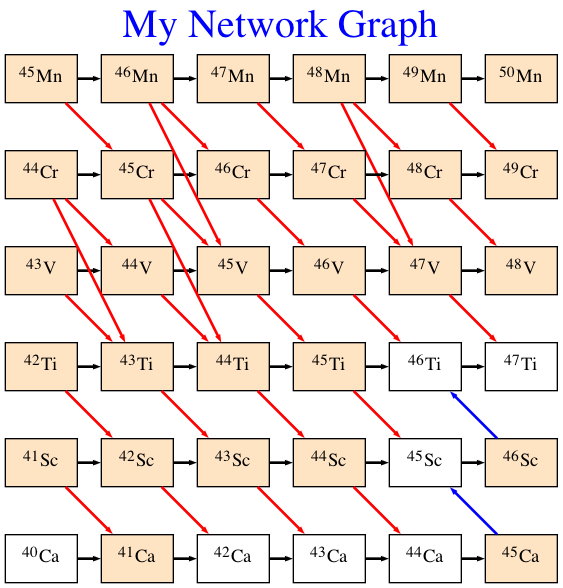

In [45]:
from IPython.display import Image
fig = Image(filename=('./test-net.png'))
fig

### Create abundance flow graph

This module will show how to create a graph showing the abundance flows between species. First, we set the title properties. Then, we specify the nuclides we would like to explore.

In [46]:
induced_nuc_xpath = "[z >= 24 and a - z >= 25 and z <= 30 and a - z <= 35]"
graph_attributes = {
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "blue",
}

To distinguish different types of reactions, we set different types of reactions to different colors with tuples. 

In [47]:
color_tuples = [
    ("[(reactant = 'h1' and product = 'n') or (reactant = 'n' and product = 'h1')]", "green",),
    ("[(reactant = 'he4' and product = 'h1') or (reactant = 'h1' and product = 'he4')]", "red",),
    ("[product = 'electron']", "blue"),
]

We can also specify the vertex edge attributions. If one wants to use one species as a special element, they can set the special attributes. Here Fe56 is an example.   

In [48]:
edge_attributes = {"arrowsize": 0.2}  # This is the default anyway

special_attributes = {
    "fe56": {"fillcolor": "cyan", "shape": "oval", "style": "filled"}
}

With all of the attributes, we can start to create the flow graph.  

In [49]:
my_graphs = wg.create_zone_flow_graphs(
    net,
    zone_20,
    induced_nuc_xpath=induced_nuc_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=False,
    edge_attributes=edge_attributes,
    solar_species = [],
    special_node_attributes=special_attributes,
)

This will return all the ingredient for a graph, we can make the graph and save it by typing:

In [50]:
for zone in my_graphs:
    A = nx.nx_agraph.to_agraph(my_graphs[zone])
    A.layout()
    A.draw('test_flow.png')

To view this graph, we can use a Image displayer by typing:

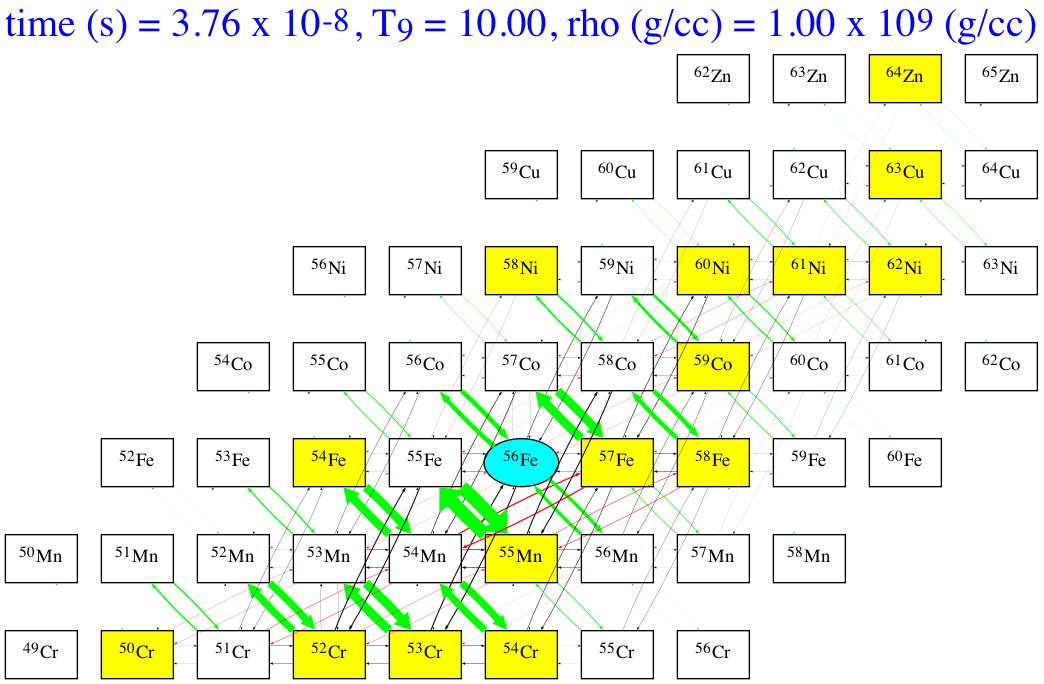

In [51]:
fig = Image(filename=('./test_flow.png'))
fig

In [52]:
# '''
# for zone in f:
#     f_max = 0
#     for r in f[zone]:
#         for tup in f[zone][r]:
#             if tup[0] in graph_nuclides and tup[1] in graph_nuclides:
#                 if tup[2] > f_max:
#                     f_max = tup[2]
#     for r, value in list(f[zone].items())[0:5]:
#         print(r, value)
#         for tup in f[zone][r]:
#             if tup[0] in graph_nuclides and tup[1] in graph_nuclides:
#                 print(r)
#                 print(
#                     "Add arc",
#                     tup[1],
#                     "->",
#                     tup[0],
#                     "with weight",
#                     tup[2] / f_max,
#                     "to graph",
#                 )
# '''